# Problem statement:
This dataset has total 111 columns and 5644 rows. Our task is to analyze the dataset and predict the expected covid cases of by developing a Regression model.

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import RFE


In [2]:
covid = pd.read_excel('covid19_clinical_dataset.xlsx')
covid.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [3]:
covid.shape

(5644, 111)

In [4]:
covid.corr()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,0.046166,0.015736,-0.035772,0.096808,0.060320,-0.158683,0.119449,-0.037510,-0.125935,...,-0.223949,-0.469049,0.570445,0.570755,0.086133,0.166245,-0.098422,-0.334562,-0.511705,-0.061265
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,1.000000,-0.011264,-0.010192,-0.087241,-0.091867,-0.183091,-0.013134,-0.053143,-0.095313,...,0.198186,-0.226778,0.033456,0.203640,-0.159803,-0.133434,0.105608,-0.173663,NaN,0.273102
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,-0.011264,1.000000,-0.008087,-0.182215,-0.177142,0.006966,-0.023475,-0.137951,-0.110574,...,-0.559117,0.113153,-0.226234,-0.178971,-0.112624,-0.136503,-0.338690,-0.091269,0.185231,-0.049042
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.035772,-0.010192,-0.008087,1.000000,-0.183850,-0.178878,0.125953,-0.073511,-0.120659,-0.109867,...,0.351994,0.298040,0.203506,-0.179731,0.424729,0.410957,0.155628,0.348072,0.129927,-0.383220
Hematocrit,0.096808,-0.087241,-0.182215,-0.183850,1.000000,0.968447,-0.082296,0.083580,0.872987,0.002035,...,-0.046283,-0.180164,-0.195979,0.063842,-0.343724,-0.340215,0.124125,0.066204,0.172490,0.878029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCO3 (arterial blood gas analysis),0.166245,-0.133434,-0.136503,0.410957,-0.340215,-0.420707,0.133917,0.266651,-0.267605,0.012786,...,-0.348558,0.513884,0.644222,-0.209320,0.992877,1.000000,-0.302613,0.104921,-1.000000,-0.434762
pO2 (arterial blood gas analysis),-0.098422,0.105608,-0.338690,0.155628,0.124125,0.081471,-0.138133,-0.226406,0.200226,0.057973,...,0.796438,-0.296518,-0.093285,0.200313,-0.314796,-0.302613,1.000000,-0.194277,-1.000000,0.270951
Arteiral Fio2,-0.334562,-0.173663,-0.091269,0.348072,0.066204,-0.003308,0.471555,0.079731,-0.257630,0.226611,...,-0.018400,0.400575,-0.262126,-0.387237,0.168055,0.104921,-0.194277,1.000000,1.000000,-0.212128
Phosphor,-0.511705,NaN,0.185231,0.129927,0.172490,0.259642,0.125356,-0.221918,0.189551,0.109370,...,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000


# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in object column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [5]:
covid.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [6]:
covid.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [7]:
covid.dropna(axis=1,how='all',inplace=True)

In [8]:
covid.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 106, dtype: int64

In [9]:
covid.shape

(5644, 106)

In [10]:
covid = covid.fillna(0)

In [11]:
covid.drop(['Patient ID','Patient age quantile'],axis=1,inplace=True)

In [12]:
for col in covid.select_dtypes(include=['object']).columns:
    covid[col] = covid[col].astype('category')
    covid[col] = covid[col].cat.codes

In [13]:
covid.head()

,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
categorical_val = []
continous_val = []
for column in covid.columns:
    print('==============================')
    print(f"{column} : {covid[column].unique()}")
    if len(covid[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

SARS-Cov-2 exam result : [0 1]
Patient addmited to regular ward (1=yes, 0=no) : [0 1]
Patient addmited to semi-intensive unit (1=yes, 0=no) : [0 1]
Patient addmited to intensive care unit (1=yes, 0=no) : [0 1]
Hematocrit : [ 0.          0.23651545 -1.57168221 -0.74769306  0.99183822  0.19073813
  1.0147264   0.7400642  -0.6790275   0.80872977 -0.10681316  1.42672145
  0.71717513  0.9460609   0.62562132 -0.15259048  0.67139781 -0.22125603
 -0.81635946 -0.65613931 -0.51880735  0.44251209 -0.54169643 -0.45014176
  1.22072399  0.28229275  0.69428688 -0.86213595  0.579844    0.03051793
 -0.03814762 -1.29701912 -1.98367643  1.03761554  2.09048939 -0.40436444
  0.76295245  1.49538696 -0.70191664 -1.36568463 -1.06813335  1.10628104
 -0.38147622  1.17494667  0.305181   -0.79347038  1.38094413  1.72427273
  0.39673564  1.63271809  1.08339286  0.46540114  1.24361217  0.83161795
 -1.82345617  0.12207258 -0.56458467  1.26650131  0.07629525  0.0076297
  0.87739527 -0.12970226  0.25940368 -0.24414513

pH (venous blood gas analysis) : [ 0.00000000e+00 -8.55513155e-01 -1.01355366e-01  3.38878133e-03
 -2.89894819e-01  2.12877080e-01 -7.50769019e-01 -1.25354087e+00
  1.28126740e+00 -5.20331979e-01 -1.43253028e-01  4.43314165e-01
  1.70979425e-01  6.62352666e-02 -6.66973770e-01 -6.04127288e-01
 -2.06099495e-01 -5.83178461e-01  2.64294124e+00 -4.57485467e-01
 -4.36536640e-01 -1.21164322e+00  3.80467683e-01 -3.52741331e-01
 -4.78434294e-01  7.99444318e-01  8.20393145e-01 -3.85088772e-02
  1.08132921e-01  1.32316506e+00  2.75723577e-01  7.36597836e-01
  1.91928253e-01  1.50030583e-01  5.27109504e-01  1.23936975e+00
  1.19747210e+00 -3.73690158e-01 -1.22304194e-01 -2.68945992e-01
  5.89955986e-01  9.25137281e-01 -3.31792474e-01  5.06160676e-01
 -1.14879680e+00  1.84688580e+00 -8.13615501e-01 -7.71717846e-01
  1.17652321e+00  4.85211849e-01  1.00893259e+00 -8.04065391e-02
  1.42790914e+00 -2.47997165e-01  2.24491358e+00  8.62290800e-01
 -6.25076115e-01  1.29081756e-01  2.54774749e-01 -8.76461

In [15]:
categorical_val

['SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Influenza B, rapid test',
 'Influenza A, rapid test',
 'Strepto A',
 'Magnesium',
 'Fio2 (venous blood gas analysis)',
 'Promyelocytes',
 'Metamyelocytes',
 'Myelocytes',
 'Myeloblasts',
 'Urine - Esterase',
 'Urine - Aspect',
 'Urine - Hemoglobin',
 'Urine - Bile pigments',
 'Urine - Ketone Bodies',
 'Urine - Nitrite',
 'Urine - Urobilinogen',
 'Urine - Protein',
 'Urine - Crystals',
 'Urine - Hyaline cylinders',
 'Urine - Granular cylind

In [16]:
data = pd.get_dummies(covid, columns = categorical_val)
data.head()

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Arteiral Fio2_-1.532931923866272,Arteiral Fio2_-1.475128173828125,Arteiral Fio2_-1.40195894241333,Arteiral Fio2_-0.5970974564552307,Arteiral Fio2_-0.4507590532302856,Arteiral Fio2_-0.01174366194754839,Arteiral Fio2_0.0,Arteiral Fio2_0.6467794179916382,Arteiral Fio2_2.110163927078247,Arteiral Fio2_2.841856241226196
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
1,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,...,0,0,0,0,0,0,1,0,0,0
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
4,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0


In [17]:
df = pd.concat((covid,data),axis=1)

In [18]:
df.head()

,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Arteiral Fio2_-1.532931923866272,Arteiral Fio2_-1.475128173828125,Arteiral Fio2_-1.40195894241333,Arteiral Fio2_-0.5970974564552307,Arteiral Fio2_-0.4507590532302856,Arteiral Fio2_-0.01174366194754839,Arteiral Fio2_0.0,Arteiral Fio2_0.6467794179916382,Arteiral Fio2_2.110163927078247,Arteiral Fio2_2.841856241226196
0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0


In [19]:
df.dtypes

SARS-Cov-2 exam result                                      int8
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
                                                          ...   
Arteiral Fio2_-0.01174366194754839                         uint8
Arteiral Fio2_0.0                                          uint8
Arteiral Fio2_0.6467794179916382                           uint8
Arteiral Fio2_2.110163927078247                            uint8
Arteiral Fio2_2.841856241226196                            uint8
Length: 320, dtype: object

# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

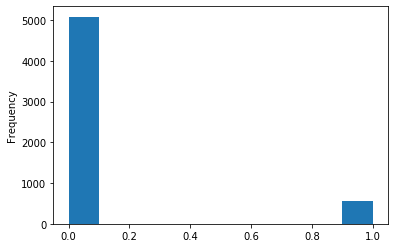

In [20]:
#Check skewness of data set
covid['SARS-Cov-2 exam result'].plot.hist()

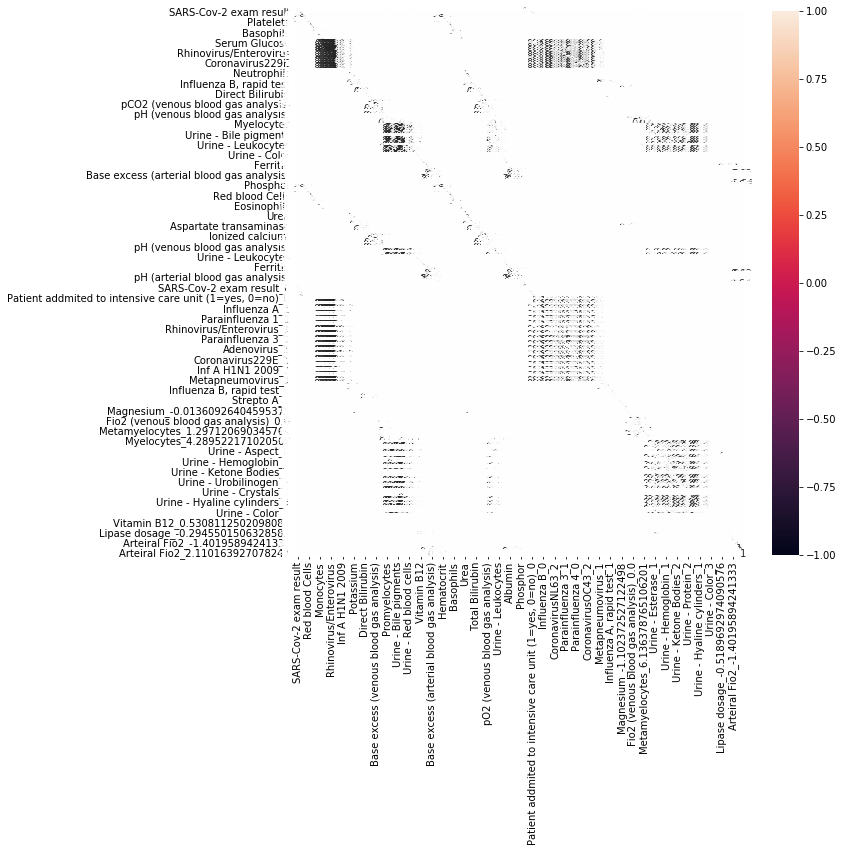

In [21]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot = True)

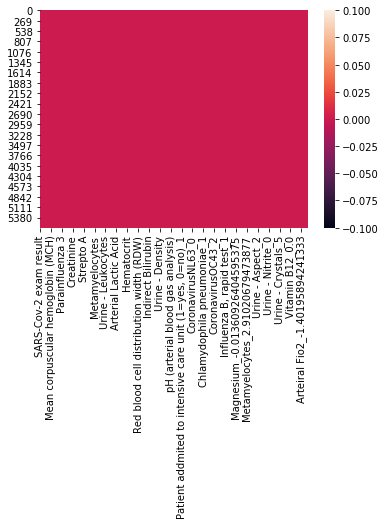

In [22]:
sns.heatmap(df.isnull())

# Model Selection:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the number of covid cases which can be increase exponetially. This scenario is a classic example of Regressions.

We are provided with 5644 rows of the labeled dataset tagged with the output column “SARS-Cov-2 exam result” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Linear problem. Based on these criteria we can narrow down our choice of models to a few:

LogisticRegression()

SVC()

DecisionTreeClassifier()

KNeighborsClassifier()

# Identifying features:
Here we are dividing our data into a dependent feature that is object as y and independent features as x.

In [23]:
y = df['SARS-Cov-2 exam result']

In [24]:
df.drop(categorical_val,axis=1,inplace=True)
x = df


# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 15% of the data we have and the remaining 85% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .15 , random_state = 44)

In [26]:
model = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('accuaracy score of',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuaracy score of 1.0
[[764   0]
 [  0  83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       764
           1       1.00      1.00      1.00        83

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847



accuaracy score of 0.9964580873671782
[[764   0]
 [  3  80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       764
           1       1.00      0.96      0.98        83

    accuracy                           1.00       847
   macro avg       1.00      0.98      0.99       847
weighted avg       1.00      1.00      1.00       847



accuaracy score of 1.0
[[764   0]
 [  0  83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       764
           1       1.00      1.00      1.00        83

    accuracy             

# we can observe that Logistic Regression() algorithem worked very well.
Accuracy score of all algorithems are as given:-

Accuracy score of Logistic Regression is 100%

Accuracy score of SVC is 99%

Accuracy score of Decision Tree Classifier is 100%

Accuracy score of K Neighbors Classifier is 98%

Hence we can say that out all algorithems Logistic Regression is working good for this problem till now. 

In [27]:
lm =LogisticRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
pred= lm.predict(x_test)
print("predicted value",pred)
print("actual value",y_test)
print('error')
print('mae',mean_absolute_error(y_test,pred))
print('mse',mean_squared_error(y_test,pred))
print('rmse',np.sqrt(mean_squared_error(y_test,pred)))
print('score',r2_score(y_test,predm))

predicted value [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 

NameError: name 'mean_absolute_error' is not defined

# Save the model using Pickle

In [ ]:
# Save the model using pickle
import pickle

filename = "pickleLRfile.pkl"
pickle.dump(lm, open(filename, 'wb'))


# Conclusion

we achieved highest accuracy score of 90% by using Logistic Regression which is good for any machine learning prediction model particularly for a linear regression problem. Finally! we successfully created a Regression Machine Learning prediction model using Python and its powerful libraries which predicts the number of covid cases.